In [1]:
# BB84 PROTOCOL
# BY ABHINAV GARG

In [2]:
# ABOUT THIS NOTEBOOK
# This notebook contains a code representing Quantum key distribution using BB84 protocol and a risk analysis for the person eavesdropping(aka 'Eavesdropping Eve' here on).
# The code generates and shares the key between 2 parties(the 2 parties being Alice and Bob here on), and checks if Eve is caught(in case she was eavesdropping)
# the code also warns with the probability of the eavesdropper(if any) of getting away
# the code explains itself as you go along... I have tried to make it AS INTERACTIVE AS POSSIBLE

In [3]:
# ABOUT THE VIDEO
# the video link is https://www.youtube.com/watch?v=3XTsYUb58uU
# I honestly tried to keep it brief but there was so much to cover... so to make-up for the inconvenience caused due to a 15 min video I have time-stamped it. Hope it helps.
# Also plz note that the video originally recorded was at approx .75X of the video I posted... it was to fit the video in 15 mins that I had to publish it at 1.3X the original one..
# I have also displayed the video in the 5th cell 

In [4]:
# In my presentation and here, all is in term of qubits. But if we think of it, what is happening in more physical terms?
# It is actually photons of polarized light(perpendicular to direction of propagation) that are being transmitted.
# it can be thought as |0> is horizontal polarization, |1> is vertical(90° with horizontal), |+> is 45° with direction of polarization |0>, and |-> is 135° with direction of polarization |0>.
# or it can rephrased as
# a string of qubits is actually a train of photons, each representing one bit of the string in the basis chosen for that bit position, a horizontal(computational basis) or 45°(hadamard basis) photon standing for a binary zero(computational basis) and a vertical or 135°(hadamard basis) photon standing for a binary 1.
# having talked about this, lets understand this quantum key distribution via the code given below.

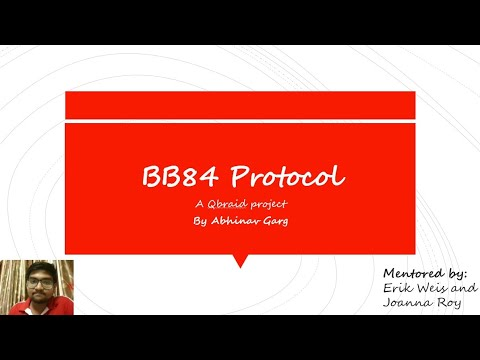

In [5]:
from IPython.display import YouTubeVideo
vid = YouTubeVideo("3XTsYUb58uU")
display(vid)

In [6]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [7]:
#installing other libraries
from qiskit import QuantumCircuit, Aer, transpile, assemble, QuantumRegister, ClassicalRegister, execute
from numpy.random import randint
import numpy as np
print("Import Successful!!... Let's dive into this journey of understanding and implementing the BB84 protocol")

Import Successful!!... Let's dive into this journey of understanding and implementing the BB84 protocol


In [8]:
#so!!... Lets start with deciding how long exactly is the message Alice is aiming to send to Bob
print("How many bits long is your message?")
msg_len = int(input())

How many bits long is your message?


 8


In [9]:
#throwing in some extra bits for reasons we will see later 
print("Would you like to generate extra bits on top of the 4*n bits? (Reply 'Y' for yes and 'N' for no)")
ans = input()
if ans == 'Y' or ans == 'y':
    print("How many extra bits would you like?")
    x = int(input())
elif msg_len <=8 :
    print("Your message isn't long enough. The code won't be able to generate enough test cases to effeciently detect eavesdropping.\nAre you sure? (Type Y to proceed without adding extra bits else type anything)")
    ans1 = input()
    if ans1 == 'Y' or ans1 == 'y':
        x = 0
    else:
        print("How many extra bits would you like?")
        x = int(input())

Would you like to generate extra bits on top of the 4*n bits? (Reply 'Y' for yes and 'N' for no)


 y


How many extra bits would you like?


 8


In [10]:
#now that we know the length of the message(say this 'msg_len' = 'n'), Alice needs a key(one-time-pad) that she shares with Bob only.
#the length of the key needs to the same as the length of the message, i.e., 'n' bits long
#But lets have Alice generate a 4*n bits key(plus the extra bits you were asked if you wanted to add earlier in the code). I'll explain the reason behind these extra bits(on top of 'n') soon. Just trust me right now.

total_bits = 4*msg_len + x # 'total_bits' is the no. of bits Alice generates to forms the key, so yeah 4*n plus the extra
Alice_bits = randint(2, size = total_bits)  #Alice generates the required string of bits randomly
print("List of the Bits generated by Alice is")
print(Alice_bits)

#Alice will be sharing these bits to Bob VIA PUBLIC CHANNEL
#These will be shared as qubits AND
#they will be shared in Hadamard basis or computational basis, randomly decided for each bit. 
#so lets call computational basis = 0 and hadamard basis =1
#So Alice generates a string of 0's and 1's which will decide the basis, the corresponding qubit is shared in.
Alice_bases = randint(2, size = total_bits) 
print("\nList of the Bases generated by Alice is")
print(Alice_bases)

List of the Bits generated by Alice is
[0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 0 0 0]

List of the Bases generated by Alice is
[1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0
 1 0 0]


In [11]:
#although each bit is communicated separately let us consider them all as a separate quantum registers of a single quantum circuit ONLY FOR THE SAKE OF BETTER VISUALIZATION.
#note that here different registers will not be interacting with each other anywhere throughout as ech qubit is operated on separately.
qc = QuantumCircuit()  #generating a quantum circuit to hold all the qubits to be transmitted
qr = QuantumRegister(total_bits) # (4*n + x) quantum registers generated
qc.add_register(qr) #all registers added to the circuit
cr = ClassicalRegister(total_bits) 
qc.add_register(cr) #classical registers to get the measurements
for i in range(total_bits): 
    if Alice_bits[i] == 1:  
        qc.x(qr[i]) #since originally all qubits are in 0 state, if the key Alice generated has a 1, it is obtained passing the qubit through a not gate
    if Alice_bases[i] == 1:
        qc.h(qr[i]) #if a qubit is to be transmitted in hadamard basis it is passed through a hadamard gate to get |+> or |-> state
    qc.barrier(qr[i]) 
qc.draw() 

┌───┐  ░     
 q0_0: ┤ H ├──░─────
       ├───┤┌───┐ ░ 
 q0_1: ┤ X ├┤ H ├─░─
       ├───┤└─░─┘ ░ 
 q0_2: ┤ H ├──░─────
       ├───┤  ░     
 q0_3: ┤ H ├──░─────
       └─░─┘  ░     
 q0_4: ──░──────────
       ┌───┐  ░     
 q0_5: ┤ X ├──░─────
       └─░─┘  ░     
 q0_6: ──░──────────
       ┌───┐  ░     
 q0_7: ┤ X ├──░─────
       └─░─┘  ░     
 q0_8: ──░──────────
       ┌───┐┌───┐ ░ 
 q0_9: ┤ X ├┤ H ├─░─
       ├───┤└─░─┘ ░ 
q0_10: ┤ H ├──░─────
       ├───┤  ░     
q0_11: ┤ H ├──░─────
       ├───┤  ░     
q0_12: ┤ H ├──░─────
       ├───┤  ░     
q0_13: ┤ H ├──░─────
       ├───┤┌───┐ ░ 
q0_14: ┤ X ├┤ H ├─░─
       ├───┤└─░─┘ ░ 
q0_15: ┤ H ├──░─────
       ├───┤  ░     
q0_16: ┤ H ├──░─────
       ├───┤┌───┐ ░ 
q0_17: ┤ X ├┤ H ├─░─
       ├───┤├───┤ ░ 
q0_18: ┤ X ├┤ H ├─░─
       └─░─┘└───┘ ░ 
q0_19: ──░──────────
       ┌───┐  ░     
q0_20: ┤ X ├──░─────
       ├───┤  ░     
q0_21: ┤ H ├──░─────
       ├───┤  ░     
q0_22: ┤ H ├──░─────
       ├───┤  ░     
q0_23: ┤ X ├──░─────
       ├───┤┌───┐ ░ 
q0_24: ┤ X ├┤ H ├─░─
       ├───┤├───┤ ░ 
q0_25: ┤ X ├┤ H ├─░─
       ├───┤└─░─┘ ░ 
q0_26: ┤ X ├──░─────
       ├───┤  ░     
q0_27: ┤ H ├──░─────
       ├───┤  ░     
q0_28: ┤ X ├──░─────
       ├───┤  ░     
q0_29: ┤ X ├──░─────
       ├───┤  ░     
q0_30: ┤ X ├──░─────
       ├───┤  ░     
q0_31: ┤ X ├──░─────
       └─░─┘  ░     
q0_32: ──░──────────
       ┌───┐┌───┐ ░ 
q0_33: ┤ X ├┤ H ├─░─
       ├───┤├───┤ ░ 
q0_34: ┤ X ├┤ H ├─░─
       ├───┤├───┤ ░ 
q0_35: ┤ X ├┤ H ├─░─
       └─░─┘└───┘ ░ 
q0_36: ──░──────────
       ┌───┐  ░     
q0_37: ┤ H ├──░─────
       └─░─┘  ░     
q0_38: ──░──────────
         ░          
q0_39: ──░──────────
         ░          
 c0_0: ═════════════
                    
 c0_1: ═════════════
                    
 c0_2: ═════════════
                    
 c0_3: ═════════════
                    
 c0_4: ═════════════
                    
 c0_5: ═════════════
                    
 c0_6: ═════════════
                    
 c0_7: ═════════════
                    
 c0_8: ═════════════
                    
 c0_9: ═════════════
                    
c0_10: ═════════════
                    
c0_11: ═════════════
                    
c0_12: ═════════════
                    
c0_13: ═════════════
                    
c0_14: ═════════════
                    
c0_15: ═════════════
                    
c0_16: ═════════════
                    
c0_17: ═════════════
                    
c0_18: ═════════════
                    
c0_19: ═════════════
                    
c0_20: ═════════════
                    
c0_21: ═════════════
                    
c0_22: ═════════════
                    
c0_23: ═════════════
                    
c0_24: ═════════════
                    
c0_25: ═════════════
                    
c0_26: ═════════════
                    
c0_27: ═════════════
                    
c0_28: ═════════════
                    
c0_29: ═════════════
                    
c0_30: ═════════════
                    
c0_31: ═════════════
                    
c0_32: ═════════════
                    
c0_33: ═════════════
                    
c0_34: ═════════════
                    
c0_35: ═════════════
                    
c0_36: ═════════════
                    
c0_37: ═════════════
                    
c0_38: ═════════════
                    
c0_39: ═════════════

In [12]:
#Now let's see, do you want Eve to eavesdrop or not
#Note that the eavesdropping could be made random by randomly generating a zero(no eavesdropping) or one(eavesdropping) and letting the code decide if eve infact eavedrops, but I wanted to give this freedom to the user to see how their input(eavesdropping) affects the final result.
print("Enter 1 if you want to eavesdrop, else enter 0")
eve = int(input())

Enter 1 if you want to eavesdrop, else enter 0


 1


In [13]:
#now lets see how does eve eavesdrop
#she cannot clone the signal due non-orthogonality of the transmitted qubits (qubits in different basis will be non-orthogonal) and no-cloning theorem
#so she will have to measure each qubit in a randomly decided basis for each one and then transmit the measured qubit to Bob in the basis it was measured in.

if eve!=0 and eve!=1: #Invalid input => no eavesdropping
    print("Invalid Input for the eavesdropping criterion; taking that no one is eavesdropping by default")

if eve == 1: #Lets see how eve measures and transmits the signal
    Eve_bases = randint(2, size = total_bits) #Eve generates a string of 0's and 1's which will decide the basis, the corresponding qubit is measured in.
    print("List of the Bases generated by Eavesdropping Eve is")
    print(Eve_bases)
    for j in range(total_bits):
        if Eve_bases[j] == 0: # measuring in computational basis
            qc.measure(qr[j],cr[j])
        if Eve_bases[j] == 1: # measuring in hadamard basis
            qc.h(qr[j])
            qc.measure(qr[j],cr[j])            
    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(qc, shots=1, memory=True)
    result = aer_sim.run(qobj).result()
    measured_bit = result.get_memory()[0]
    eve_rec = [int(a) for a in str(measured_bit)]
    eve_rec.reverse()
    print("\nThe list of Bits as measured by eve")
    print(eve_rec)
    for j in range(total_bits):
        if Eve_bases[j] == 1: # transmitting in hadamard basis
            qc.h(qr[j]) 
        qc.barrier(qr[j]) #the barrier represents eve has measured and transmitted
    #print(len(eve_rec))
if eve==0:
    print("ready to proceed")

List of the Bases generated by Eavesdropping Eve is
[0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0
 0 0 1]

The list of Bits as measured by eve
[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]


In [14]:
qc.draw() #let us see how things look so far

┌───┐  ░                 ┌─┐ ░                                        »
 q0_0: ┤ H ├──░─────────────────┤M├─░────────────────────────────────────────»
       ├───┤┌───┐  ░            └╥┘ ░                                        »
 q0_1: ┤ X ├┤ H ├──░─────────────╫───────────────────────────────────────────»
       ├───┤└─░─┘  ░             ║ ┌─┐ ░                                     »
 q0_2: ┤ H ├──░──────────────────╫─┤M├─░─────────────────────────────────────»
       ├───┤  ░                  ║ └╥┘┌─┐ ░                                  »
 q0_3: ┤ H ├──░──────────────────╫──╫─┤M├─░──────────────────────────────────»
       └─░─┘┌───┐                ║  ║ └╥┘┌─┐┌───┐  ░                         »
 q0_4: ──░──┤ H ├────────────────╫──╫──╫─┤M├┤ H ├──░─────────────────────────»
       ┌───┐└─░─┘┌───┐           ║  ║  ║ └╥┘└───┘  ░                         »
 q0_5: ┤ X ├──░──┤ H ├───────────╫──╫──╫──╫──────────────────────────────────»
       └─░─┘┌───┐└───┘           ║  ║  ║  ║  ┌─┐ ┌───┐ ░                     »
 q0_6: ──░──┤ H ├────────────────╫──╫──╫──╫──┤M├─┤ H ├─░─────────────────────»
       ┌───┐└─░─┘                ║  ║  ║  ║  └╥┘ └┬─┬┘ ░                     »
 q0_7: ┤ X ├──░──────────────────╫──╫──╫──╫───╫───┤M├──░─────────────────────»
       └─░─┘┌───┐                ║  ║  ║  ║   ║   └╥┘ ┌─┐┌───┐ ░             »
 q0_8: ──░──┤ H ├────────────────╫──╫──╫──╫───╫────╫──┤M├┤ H ├─░─────────────»
       ┌───┐├───┤  ░             ║  ║  ║  ║   ║    ║  └╥┘└───┘ ░             »
 q0_9: ┤ X ├┤ H ├──░─────────────╫──╫──╫──╫───╫────╫───╫─────────────────────»
       ├───┤└─░─┘┌───┐           ║  ║  ║  ║   ║    ║   ║                     »
q0_10: ┤ H ├──░──┤ H ├───────────╫──╫──╫──╫───╫────╫───╫─────────────────────»
       ├───┤  ░  ├───┤           ║  ║  ║  ║   ║    ║   ║                     »
q0_11: ┤ H ├──░──┤ H ├───────────╫──╫──╫──╫───╫────╫───╫─────────────────────»
       ├───┤  ░  ├───┤           ║  ║  ║  ║   ║    ║   ║                     »
q0_12: ┤ H ├──░──┤ H ├───────────╫──╫──╫──╫───╫────╫───╫─────────────────────»
       ├───┤  ░  └───┘           ║  ║  ║  ║   ║    ║   ║  ┌─┐  ░             »
q0_13: ┤ H ├──░──────────────────╫──╫──╫──╫───╫────╫───╫──┤M├──░─────────────»
       ├───┤┌───┐  ░             ║  ║  ║  ║   ║    ║   ║  └╥┘  ░             »
q0_14: ┤ X ├┤ H ├──░─────────────╫──╫──╫──╫───╫────╫───╫───╫─────────────────»
       ├───┤└─░─┘┌───┐           ║  ║  ║  ║   ║    ║   ║   ║                 »
q0_15: ┤ H ├──░──┤ H ├───────────╫──╫──╫──╫───╫────╫───╫───╫─────────────────»
       ├───┤  ░  ├───┤           ║  ║  ║  ║   ║    ║   ║   ║                 »
q0_16: ┤ H ├──░──┤ H ├───────────╫──╫──╫──╫───╫────╫───╫───╫─────────────────»
       ├───┤┌───┐└─░─┘┌───┐      ║  ║  ║  ║   ║    ║   ║   ║                 »
q0_17: ┤ X ├┤ H ├──░──┤ H ├──────╫──╫──╫──╫───╫────╫───╫───╫─────────────────»
       ├───┤├───┤  ░  ├───┤      ║  ║  ║  ║   ║    ║   ║   ║                 »
q0_18: ┤ X ├┤ H ├──░──┤ H ├──────╫──╫──╫──╫───╫────╫───╫───╫─────────────────»
       └─░─┘└───┘ ┌─┐ └─░─┘      ║  ║  ║  ║   ║    ║   ║   ║                 »
q0_19: ──░────────┤M├───░────────╫──╫──╫──╫───╫────╫───╫───╫─────────────────»
       ┌───┐  ░   └╥┘   ░        ║  ║  ║  ║   ║    ║   ║   ║  ┌─┐ ░          »
q0_20: ┤ X ├──░────╫─────────────╫──╫──╫──╫───╫────╫───╫───╫──┤M├─░──────────»
       ├───┤  ░    ║             ║  ║  ║  ║   ║    ║   ║   ║  └╥┘┌─┐ ░       »
q0_21: ┤ H ├──░────╫─────────────╫──╫──╫──╫───╫────╫───╫───╫───╫─┤M├─░───────»
       ├───┤  ░    ║             ║  ║  ║  ║   ║    ║   ║   ║   ║ └╥┘┌─┐ ░    »
q0_22: ┤ H ├──░────╫─────────────╫──╫──╫──╫───╫────╫───╫───╫───╫──╫─┤M├─░────»
       ├───┤  ░    ║  ┌───┐      ║  ║  ║  ║   ║    ║   ║   ║   ║  ║ └╥┘ ░    »
q0_23: ┤ X ├──░────╫──┤ H ├──────╫──╫──╫──╫───╫────╫───╫───╫───╫──╫──╫───────»
       ├───┤┌───┐  ║  └─░─┘      ║  ║  ║  ║   ║    ║   ║   ║   ║  ║  ║       »
q0_24: ┤ X ├┤ H ├──╫────░────────╫──╫──╫──╫───╫────╫───╫───╫───╫──╫──╫───────»
       ├───┤├───┤  ║    ░        ║  ║  ║  ║   ║    ║   ║ 

In [15]:
#Now Bob recieves the signal
Bob_bases = randint(2, size = total_bits) #Bob generates a string of 0's and 1's which will decide the basis, the corresponding qubit is measured in.
print("List of the Bases generated by Bob is")
print(Bob_bases)
print("\n")
for q in range(total_bits):
    if Bob_bases[q] == 0: # measuring in computational basis
        qc.measure(qr[q],cr[q])
    if Bob_bases[q] == 1: # measuring in hadamard basis
        qc.h(qr[q])
        qc.measure(qr[q],cr[q])
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, shots=1, memory=True)
result = aer_sim.run(qobj).result()
measured_bit = result.get_memory()[0]

msg_rec = [int(a) for a in str(measured_bit)] #the measured bit is 4*n + x digits long, storing each bit it in a list
msg_rec.reverse() #since measurements are from last quantum register to the first one, reversing the obtained list to get the ORDER IN WHICH BOB RECIEVES
print("The message recorded by Bob is")
print(msg_rec)
#print(len(msg_rec))

List of the Bases generated by Bob is
[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 0 0 1]


The message recorded by Bob is
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]


In [16]:
qc.draw() #finally this is how things look

┌───┐  ░                 ┌─┐ ░ ┌───┐                                    »
 q0_0: ┤ H ├──░─────────────────┤M├─░─┤ H ├────────────────────────────────────»
       ├───┤┌───┐  ░            └╥┘ ░ └───┘                                    »
 q0_1: ┤ X ├┤ H ├──░─────────────╫─────────────────────────────────────────────»
       ├───┤└─░─┘  ░             ║ ┌─┐  ░                                      »
 q0_2: ┤ H ├──░──────────────────╫─┤M├──░──────────────────────────────────────»
       ├───┤  ░                  ║ └╥┘ ┌─┐  ░ ┌───┐                            »
 q0_3: ┤ H ├──░──────────────────╫──╫──┤M├──░─┤ H ├────────────────────────────»
       └─░─┘┌───┐                ║  ║  └╥┘ ┌─┐├───┤  ░                         »
 q0_4: ──░──┤ H ├────────────────╫──╫───╫──┤M├┤ H ├──░─────────────────────────»
       ┌───┐└─░─┘┌───┐           ║  ║   ║  └╥┘└───┘  ░                         »
 q0_5: ┤ X ├──░──┤ H ├───────────╫──╫───╫───╫──────────────────────────────────»
       └─░─┘┌───┐└───┘           ║  ║   ║   ║  ┌─┐ ┌───┐ ░                     »
 q0_6: ──░──┤ H ├────────────────╫──╫───╫───╫──┤M├─┤ H ├─░─────────────────────»
       ┌───┐└─░─┘                ║  ║   ║   ║  └╥┘ └┬─┬┘ ░                     »
 q0_7: ┤ X ├──░──────────────────╫──╫───╫───╫───╫───┤M├──░─────────────────────»
       └─░─┘┌───┐                ║  ║   ║   ║   ║   └╥┘ ┌─┐┌───┐ ░             »
 q0_8: ──░──┤ H ├────────────────╫──╫───╫───╫───╫────╫──┤M├┤ H ├─░─────────────»
       ┌───┐├───┤  ░             ║  ║   ║   ║   ║    ║  └╥┘└───┘ ░             »
 q0_9: ┤ X ├┤ H ├──░─────────────╫──╫───╫───╫───╫────╫───╫─────────────────────»
       ├───┤└─░─┘┌───┐           ║  ║   ║   ║   ║    ║   ║                     »
q0_10: ┤ H ├──░──┤ H ├───────────╫──╫───╫───╫───╫────╫───╫─────────────────────»
       ├───┤  ░  ├───┤           ║  ║   ║   ║   ║    ║   ║                     »
q0_11: ┤ H ├──░──┤ H ├───────────╫──╫───╫───╫───╫────╫───╫─────────────────────»
       ├───┤  ░  ├───┤           ║  ║   ║   ║   ║    ║   ║                     »
q0_12: ┤ H ├──░──┤ H ├───────────╫──╫───╫───╫───╫────╫───╫─────────────────────»
       ├───┤  ░  └───┘           ║  ║   ║   ║   ║    ║   ║  ┌─┐  ░             »
q0_13: ┤ H ├──░──────────────────╫──╫───╫───╫───╫────╫───╫──┤M├──░─────────────»
       ├───┤┌───┐  ░             ║  ║   ║   ║   ║    ║   ║  └╥┘  ░             »
q0_14: ┤ X ├┤ H ├──░─────────────╫──╫───╫───╫───╫────╫───╫───╫─────────────────»
       ├───┤└─░─┘┌───┐           ║  ║   ║   ║   ║    ║   ║   ║                 »
q0_15: ┤ H ├──░──┤ H ├───────────╫──╫───╫───╫───╫────╫───╫───╫─────────────────»
       ├───┤  ░  ├───┤           ║  ║   ║   ║   ║    ║   ║   ║                 »
q0_16: ┤ H ├──░──┤ H ├───────────╫──╫───╫───╫───╫────╫───╫───╫─────────────────»
       ├───┤┌───┐└─░─┘┌───┐      ║  ║   ║   ║   ║    ║   ║   ║                 »
q0_17: ┤ X ├┤ H ├──░──┤ H ├──────╫──╫───╫───╫───╫────╫───╫───╫─────────────────»
       ├───┤├───┤  ░  ├───┤      ║  ║   ║   ║   ║    ║   ║   ║                 »
q0_18: ┤ X ├┤ H ├──░──┤ H ├──────╫──╫───╫───╫───╫────╫───╫───╫─────────────────»
       └─░─┘└───┘ ┌─┐ └─░─┘      ║  ║   ║   ║   ║    ║   ║   ║                 »
q0_19: ──░────────┤M├───░────────╫──╫───╫───╫───╫────╫───╫───╫─────────────────»
       ┌───┐  ░   └╥┘   ░        ║  ║   ║   ║   ║    ║   ║   ║  ┌─┐ ░          »
q0_20: ┤ X ├──░────╫─────────────╫──╫───╫───╫───╫────╫───╫───╫──┤M├─░──────────»
       ├───┤  ░    ║             ║  ║   ║   ║   ║    ║   ║   ║  └╥┘┌─┐ ░       »
q0_21: ┤ H ├──░────╫─────────────╫──╫───╫───╫───╫────╫───╫───╫───╫─┤M├─░───────»
       ├───┤  ░    ║             ║  ║   ║   ║   ║    ║   ║   ║   ║ └╥┘┌─┐ ░    »
q0_22: ┤ H ├──░────╫─────────────╫──╫───╫───╫───╫────╫───╫───╫───╫──╫─┤M├─░────»
       ├───┤  ░    ║  ┌───┐      ║  ║   ║   ║   ║    ║   ║   ║   ║  ║ └╥┘ ░    »
q0_23: ┤ X ├──░────╫──┤ H ├──────╫──╫───╫───╫───╫────╫───╫───╫───╫──╫──╫───────»
       ├───┤┌───┐  ║  └─░─┘      ║  ║   ║   ║   ║    ║   ║   ║   ║  ║  ║       »
q0_24: ┤ X ├┤ H ├──╫────░────────╫──╫─

In [17]:
#Now Alice and Bob announce their bases publicly and compare to check the same ones
# after discarding bits with different bases, out of 4*n + x only approx 2*n + x/2 survive (this loss is part of the reason behind generating the extra bits for key).
# now all the bits that are extra(total_common - n) can be used to test and ensure noone was eavesdropping
common_bases =[]
for l in range(total_bits):
    if Bob_bases[l] == Alice_bases[l]:
        common_bases.append((l+1))
print(common_bases)

[1, 2, 4, 5, 6, 7, 8, 9, 18, 20, 21, 26, 30, 33, 34, 35, 39]


In [18]:
common = int(len(common_bases))
print("No. of indices for which Bob and Alice picked the same base are = ", common)

No. of indices for which Bob and Alice picked the same base are =  17


In [19]:
#Lets see the risk analysis starting from the next cell with the help a single qubit Quantum circuit QC 
#Say Eve is intercepting a single qubit(QC) transmitted by Alice to Bob
# if common< 2*msg_len:
#     print("CAUTION: Total number of bases that match is less than twice the length of your message,\n\tthis increases the chances of the Eavesdropper(if any) successfully getting away\n\tIT IS ADVISED TO TERMINATE THE EXPERIMENT HERE, AND REPEAT IT.")
# else:
#     print("Enough Bases match; You are good to go.")

#THE CODE IN NEXT 4 CELLS IS NOT PART OF THE PROCESS, BUT TO LEARN SOMETHING
#Note That the Quantum circuit so far was named lowercase 'qc', for this explanation a new Quantum circuit is generated namely uppercase 'QC' 

In [20]:
#case:1 - both alice and bob choose computational basis
#case:1a - Eve also chooses computational basis
QC=QuantumCircuit(1, 1) #Alice generates and sends
QC.barrier()

QC.measure(0, 0)#Eve measures and sends the same
QC.barrier()

QC.measure(0, 0)#Bob measures

backend = Aer.get_backend('qasm_simulator')
sin= execute(QC,backend)
sin_result = sin.result()
counts = sin_result.get_counts()
print(counts)
#Note that eve gets away always(100% of times)

{'0': 1024}


In [21]:
#case:1 - both alice and bob choose computational basis
#case:1b - Eve chooses hadamard basis
QC=QuantumCircuit(1, 1) #Alice generates and sends
QC.barrier()

QC.h(0)
QC.measure(0, 0)#Eve measures and sends the same
QC.h(0)
QC.barrier()

QC.measure(0, 0)#Bob measures

sin= execute(QC,backend)
sin_result = sin.result()
counts = sin_result.get_counts()
print(counts)
#note that Eve gets away 50% of times

{'1': 514, '0': 510}


In [22]:
#case:2 - both alice and bob choose hadamard basis
#case:2a - Eve chooses computational basis
QC=QuantumCircuit(1, 1) #Alice generates and sends
QC.h(0)
QC.barrier()

QC.measure(0, 0)#Eve measures and sends the same
QC.barrier()

QC.h(0)
QC.measure(0, 0)#Bob measures

sin= execute(QC,backend)
sin_result = sin.result()
counts = sin_result.get_counts()
print(counts)
#note that Eve gets away 50% of times

{'1': 522, '0': 502}


In [23]:
#case:2 - both alice and bob choose hadamard basis
#case:2a - Eve chooses hadamard basis
QC=QuantumCircuit(1, 1) #Alice generates and sends
QC.h(0)
QC.barrier()

QC.h(0)
QC.measure(0, 0)#Eve measures and sends the same
QC.h(0)
QC.barrier()

QC.h(0)
QC.measure(0, 0)#Bob measures

sin= execute(QC,backend)
sin_result = sin.result()
counts = sin_result.get_counts()
print(counts)
#Note that eve gets away always(100% of times)

{'0': 1024}


In [24]:
#CONCLUSION FROM THE 4 CELLS ABOVE:
#Since the 4 cases above are equally likely, 
#interception on a single qubit goes undetected has probability = 0.25(1) + 0.25(0.5) + 0.25(0.5) + 0.25(1) = 0.75
#for eve to get away she will have to intercept all the test qubits(say total = 't') successfully
#thus PROBABILITY OF SUCCESSFUL INTERCEPTION IS = (0.75)^t
#note that t=8 => 10% chance of successful intercetion, t=16 => 1% chance of successful interception, and for larger no. of test cases this percentage can be further reduced.
#see this is why we generate atleast 4*n bits in the start, these are reduced to approx 2*n when the ones having different bases for Alice and bob are discarded, and the n extra ones here can be used to test for eavesdroppers and the 'x' more bits added on top, make the system more efficient.

In [25]:
#randomly choosing bits to preserve for key or to use for test
if common<(msg_len):
    print("not enough bases match; kindly repeat the experiment")
else:
    test = []
    t = common - msg_len
    while t>0:
        n = int(randint(0, total_bits))
        if n in common_bases:
            test.append(n)
            common_bases.remove(n)
            t = t-1
    print("Indices that will be used for test are:", test)
    print("Indices that will be used to generate the One-Time-Pad if test is suceessful are:", common_bases)
    print("Eve(if eavesdropping) has", (((0.75)**(len(test)))*100), "% chances of getting away.\nYou can decrease this probability by repeating the experiment and adding more bits to the initial key generated")
    #so more are the test cases, more will be our chances of detecting the eavesdropper(if any)... that is why those extra bits asked for at the beginning help

Indices that will be used for test are: [30, 5, 4, 20, 9, 33, 21, 26, 7]
Indices that will be used to generate the One-Time-Pad if test is suceessful are: [1, 2, 6, 8, 18, 34, 35, 39]
Eve(if eavesdropping) has 7.5084686279296875 % chances of getting away.
You can decrease this probability by repeating the experiment and adding more bits to the initial key generated


In [26]:
#testing and giving the final result
if common<(msg_len):
    print("ERROR: Not enough Bases match; Kindly repeat the experiment")
else:
    flag = 1
    t =0
    for i in test:
        #print(i)
        if Alice_bits[i-1] != msg_rec[i-1]:
            flag = 0
            t = t+1
    if flag == 1:
        print("No one is Eavesdropping")
        print("\nHence the One-Time-Pad is")
        print("\nAlice Bob")
        for h in common_bases:
            print(Alice_bits[h-1],"   ", msg_rec[h-1])
        flag_1 = 1
        for h in common_bases:
            if Alice_bits[h-1] != msg_rec[h-1]:
                flag =0
        if flag==1 and eve!=1:
            print("\nSuccess!")
        elif flag==1 and eve==1:
            print("\nEve was eavsdropping but got so lucky that it became impossible to catch her, EVERY BIT MATCHES")
        elif flag==0:
            print("\nUh-Oh, Eavesdropping Eve Got Lucky!... Well she did have", (((0.75)**(len(test)))*100), "% chances of getting away.")
    else:
        print("EAVESDROPPING DETECTED.", t, "out of", len(test), "tests failed.")
        print("\nNote that due to the eavesdropping, the generated One-Time-Pad need not be same for Bob and Alice\n(it might match accidentally for some cases)")
        print("\nAlice Bob")
        for h in common_bases:
            print(Alice_bits[h-1],"   ", msg_rec[h-1])

EAVESDROPPING DETECTED. 5 out of 9 tests failed.

Note that due to the eavesdropping, the generated One-Time-Pad need not be same for Bob and Alice
(it might match accidentally for some cases)

Alice Bob
0     0
1     0
1     0
1     1
1     1
1     0
1     1
0     0


In [27]:
#just a check introduced while debugging the code
# print(len(eve_rec))
# print(len(msg_rec))

print("THE END")
print("Thank You!! :)")

THE END
Thank You!! :)
